# <U><h1><center> ANALYZING NYC HIGH SCHOOL DATA</center></h1></U>

###  <U><h1><center> Work Flow of This Project</center></h1></U>
                           
##                                         <center> A. Purpose of The Project </center>
<br>

##                                  <center> B. Cleaning and Understanding the Data.</center>
<br>

##                                   <center>C. Combining The Data. </center>
                            
<br>

##                                   <center> D. Analyzing and Visualizing The Data. </center>


# <h1><center> A. Purpose of The Project.</center></h1>

### Introdution:

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between __SAT scores__ and __demographics__ might be an interesting angle to take. We could correlate __SAT scores__ with factors like __race, gender, income, and more__.

<br>

[__The SAT__](https://en.wikipedia.org/wiki/SAT), or __Scholastic Aptitude Test__, is an exam that U.S. high school students take before applying to college. 

<br>


Colleges take the test scores into account when deciding who to admit, so it's important to perform well.

<br>

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the dataset for our project is based on 2,400 total points). Organizations often rank high schools by their __average SAT scores__. The scores are also considered a measure of overall school district quality.

<br>

New York City makes its data on high school __SAT scores__ available online, as well as the __demographics__ for each high school.


<br>


### Further Research:

After research we learnt the following:


- Only high school students take the __SAT__, so we'll want to focus on high schools.

<br>

- New York City is made up of __five boroughs__, which are essentially distinct regions.

<br>

- New York City schools fall within several different school districts, each of which can contains dozens of schools.

<br>

- Our datasets include several different types of schools. We'll need to clean them so that we can focus on high schools only.

<br>

- Each school in New York City has a unique code called a __DBN__ or district __borough number__.

<br>

- Aggregating data by district allows us to use the district mapping data to plot district-by-district differences.

<br>


### Purpose of Project:

We will study the correlations between various columns and __SAT scores__. In particular, we want to figure out the following:

- __How does SAT_score correlate with factors like race, gender, average class size, safety_score amongst other interesting columns.__

# <h1><center> B. Cleaning and Understanding the Data.</center></h1>

# <u> Links To All The Individual Data sets used and their Data Dictionaries. </u>

Here are the links to all of the datasets we'll be using:

[SAT scores by school](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City


[School attendance](https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt) - Attendance information for each school in New York City


[Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school


[AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)


[Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) - The percentage of students who graduated, and other outcome information


[Demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) - Demographic information for each school


[School survey](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

# <u> All Libraries Used In This Project. </u>

In [1]:
# Import the libraries required for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# <u>Reading in The Data. </u>

In [2]:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}
for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    key_name = f.replace(".csv", "")
    data[key_name] = d

I am mainly interested in is the SAT dataset, which corresponds to the dictionary key __sat_results__. This dataset contains the SAT scores for each high school in New York City. We eventually want to correlate selected information from this dataset with information in the other datasets.

# <u>Explore sat_results. </u>

In [3]:
# Print the first five rows of the sat_results dataframe
print(data["sat_results"].head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

## _Key Observations:_

- The __DBN__ appears to be a __unique ID__ for each school.


- We can tell from the first few rows of names that we only have data about __high schools__.


- There's only a single row for each high school, so each DBN is unique in the SAT data.


- We may eventually want to combine the three columns that contain SAT scores -- __SAT Critical Reading Avg. Score__, __SAT Math Avg. Score__, and __SAT Writing Avg. Score__ -- into a single column to make the scores easier to analyze.

 # <u>Explore the Other Datasets. </u>

In [4]:
# Let's explore the other datasets to see if we can gain any insight into how to combine them.
for k in data:
    print(data[k].head())

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1

## _Key Observations:_

We can make some observations based on the first few rows of each one:

- Each dataset appears to either have a __DBN__ column or the information we need to create one. That means we can use a __DBN__ column to combine the datasets. First we'll pinpoint matching rows from different datasets by looking for identical __DBNs__, then group all of their columns together in a single dataset.


- Some fields look interesting for mapping -- particularly __Location 1__, which contains coordinates inside a larger string.


- Some of the datasets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each __DBN__ is unique within each dataset. If we don't do this, we'll run into problems when we combine the datasets, because we might be merging two rows in one data set with one row in another dataset.

# <u>Reading in the Text Files. </u>

Before we proceed with the merge, we should make sure we have all of the data we want to unify. We mentioned the survey data earlier __(survey_all.txt and survey_d75.txt)__, but we didn't read those files in because they're in a slightly more complex format.

In [5]:
# Read in the survey_all text data.
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')

# Read in the survey_d75 text data.
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')

# Combine d75_survey and all_survey into a single dataframe.
survey = pd.concat([all_survey, d75_survey], axis=0)

# Display the first five rows of survey
print(survey.head())

      dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p  ...  s_q14_2  \
0         0.0           Elementary School   NaN    88    60  ...      NaN   
1         0.0           Elementary School   NaN   100    60  ...      NaN   
2         0.0           Elementary School   NaN    88    73  ...      NaN   
3         0.0  Elementary / Middle School  89.0    73    50  ...      NaN   
4         0.0           Elementary School   NaN   100    60  ...      NaN   

   s_q14_3  s_q14_4  s_q14_5  s_q14_6  s_q14_7  s_q14_8  s_q14_9  s_q14_10  \
0      NaN      NaN 

## _Key Observations:_

There are two immediate facts that we can see in the data:

- There are over __2000 columns__, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns makes it easier to print the dataframe out and find correlations within it.


- The survey data has a __dbn__ column that we'll want to convert to uppercase __(DBN)__. The conversion makes the column name consistent with the other data sets.

# <u>Filter Columns Out.</u>

First, we'll need to filter the columns to remove the ones we don't need. There's a data dictionary at the [original data download location](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8). The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

In [6]:
# Copy the data from the dbn column of survey into a new column in survey called DBN.
survey["DBN"] = survey["dbn"]

# Columns that are relevant based on the data dictionary
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

# Filter out columns
survey = survey.loc[:,survey_fields]
data["survey"] = survey

# Display data to confirm changes
print(survey.head())

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


      DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_p_11  com_p_11  eng_p_11  \
0  01M015   NaN    88    60    NaN  22.0   90.0       8.5       7.6       7.5   
1  01M019   NaN   100    60    NaN  34.0  161.0       8.4       7.6       7.6   
2  01M020   NaN    88    73    NaN  42.0  367.0       8.9       8.3       8.3   
3  01M034  89.0    73    50  145.0  29.0  151.0       8.8       8.2       8.0   
4  01M063   NaN   100    60    NaN  23.0   90.0       8.7       7.9       8.1   

   ...  eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0  ...       7.6       7.9       NaN       NaN       NaN       NaN   
1  ...       8.9       9.1       NaN       NaN       NaN       NaN   
2  ...       6.8       7.5       NaN       NaN       NaN       NaN   
3  ...       6.8       7.8       6.2       5.9       6.5       7.4   
4  ...       7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  
0         8.0         7.7         7.5   

In [7]:
df1 = survey.copy()

In [8]:
print(df1.head())

      DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_p_11  com_p_11  eng_p_11  \
0  01M015   NaN    88    60    NaN  22.0   90.0       8.5       7.6       7.5   
1  01M019   NaN   100    60    NaN  34.0  161.0       8.4       7.6       7.6   
2  01M020   NaN    88    73    NaN  42.0  367.0       8.9       8.3       8.3   
3  01M034  89.0    73    50  145.0  29.0  151.0       8.8       8.2       8.0   
4  01M063   NaN   100    60    NaN  23.0   90.0       8.7       7.9       8.1   

   ...  eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0  ...       7.6       7.9       NaN       NaN       NaN       NaN   
1  ...       8.9       9.1       NaN       NaN       NaN       NaN   
2  ...       6.8       7.5       NaN       NaN       NaN       NaN   
3  ...       6.8       7.8       6.2       5.9       6.5       7.4   
4  ...       7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  
0         8.0         7.7         7.5   

## _Key Observations:_

When we explored all of the datasets, we noticed that some of them, like __class_size__ and __hs_directory__, don't have a __DBN__ column. __hs_directory__ does have a __dbn__ column, though, so we can just rename it.

# <u>Check out 'class_size' data set.</u>

However, __class_size__ doesn't appear to have the __dbn__column at all. Here are the first few rows of the data set:

In [9]:
# First few rows of class_size data set
class_size = pd.read_csv("schools\\class_size.csv")
class_size.head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN


Below are the first few rows of the __sat_results data__, which does have a __DBN column__:

In [10]:
# First few rows of sat_results data 
sat_results = pd.read_csv("schools\\sat_results.csv")
sat_results.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370


From looking at these rows, we can tell that the __DBN__ in the __sat_results__ data is just a combination of the __CSD__ and __SCHOOL CODE__ columns in the __class_size__ data. The main difference is that the __DBN__ is padded, so that the __CSD__ portion of it always consists of two digits. That means we'll need to add a leading __0__ to the __CSD__ if the __CSD__ is less than two digits long. Here's a diagram illustrating what we need to do:

|CSD || Padded CSD |
|----||------------|
|1   || 01         |
|----||------------|
|19  || 19         |
|----||------------|
|2   || 02         | 
|----||------------|
|99  || 99         |


As you can see, whenever the CSD is less than two digits long, we need to add a leading 0.

# <u>Applying the changes above.</u>

In [11]:
# Copy the dbn column in hs_directory into a new column called DBN
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]


def pad_csd(num):
    '''Takes in a number
       Converts the number to a string using the str() function.
       Check the length of the string using the len() function.
        -If the string is two digits long, returns the string.
        -If the string is one digit long, adds a 0 to the front of the string, then returns it.
        -You can use the string method zfill() to do this.'''
    return str(num).zfill(2)

# Create a new column called "padded_csd" in the "class_size" dataset.
# I did this using the pandas.Series.apply() method along with the custom function to generate this column.
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)

# Use the addition operator (+) along with the padded_csd and SCHOOL CODE columns of class_size
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

# Display the first few rows of class_size to double check the DBN column.
print(data["class_size"].head())

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


# <u>Coverting the relevant columns into a data type convenient for analysis.</u>

Now we're almost ready to combine our datasets. Before we do, let's take some time to calculate variables that are useful in our analysis. We've already discussed one such variable -- a column that totals up the SAT scores for the different sections of the exam. This makes it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.


Before we can generate this column, we'll need to convert the __SAT Math Avg. Score__, __SAT Critical Reading Avg. Score__, and __SAT Writing Avg. Score__ columns in the __sat_results__ dataset from the __object (string)__ data type to a __numeric data type__. We can use the pandas.to_numeric() method for the conversion. If we don't convert the values, we won't be able to add the columns together.

In [12]:
# Convert columns to numeric data types
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")
    
# Create a column called sat_score in sat_results that holds the combined SAT score for each student.
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

# Display the first few rows of the sat_score column of sat_results to verify that everything went okay.
print(data['sat_results']['sat_score'].head())

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64


# <u> Parsing the latitude and longitude coordinates for each school.</u>

We'll want to parse the latitude and longitude coordinates for each school. This enables us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field __Location 1__ in the __hs_directory__ dataset.

### 1. _For Latitude_

In [13]:
# Create Custom Function
def find_lat(loc):
    '''- Takes in a string
       - Uses a regular expression to extract the coordinates
       - Uses string manipulation functions to pull out the latitude
       - Returns the latitude'''
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

# Apply the function across the Location 1 column of hs_directory
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)

# Display the first few rows of hs_directory to verify the results.
print(data["hs_directory"].head())

      dbn                                        school_name       boro  \
0  17K548                Brooklyn School for Music & Theatre   Brooklyn   
1  09X543                   High School for Violin and Dance      Bronx   
2  09X327        Comprehensive Model School Project M.S. 327      Bronx   
3  02M280     Manhattan Early College School for Advertising  Manhattan   
4  28Q680  Queens Gateway to Health Sciences Secondary Sc...     Queens   

  building_code    phone_number    fax_number grade_span_min  grade_span_max  \
0          K440    718-230-6250  718-230-6262              9              12   
1          X400    718-842-0687  718-589-9849              9              12   
2          X240    718-294-8111  718-294-8109              6              12   
3          M520  718-935-3477             NaN              9              10   
4          Q695    718-969-3155  718-969-3552              6              12   

  expgrade_span_min  expgrade_span_max  ...  \
0               NaN  

### 2. _For Longitude_

In [14]:
# Custom function for extracting longitude.
def find_lon(loc):
    '''- Takes in a string.
       - Uses the regular expression on the previous screen to extract the coordinates.
       - Uses string manipulation functions to pull out the longitude.
       - Returns the longitude.'''
    coords = re.findall("\(.+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

# Apply the function across the Location 1 column of hs_directory.
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

# Convert the lat and lon columns of hs_directory to numbers.
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

# <h1><center> C. Combining The Data.</center></h1>

The first thing we'll need to do in preparation for the merge is condense some of the datasets. In the last lesson, we noticed that the values in the __DBN__ column were unique in the __sat_results__ data set. Other data sets like __class_size__ had duplicate __DBN__ values.

We'll need to condense these datasets so that each value in the __DBN__ column is unique. If not, we'll run into issues when it comes time to combine the datasets.


The first dataset that we'll condense is __class_size__. The first few rows of __class_size__ look as below:

In [15]:
# First few rows of the 'class_size' data
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


## _Key Observations:_

- As you can see, the first few rows all pertain to the same school, which is why the __DBN__ appears more than once.


- It looks like each school has multiple values for 
   
   * __GRADE__,
   
  <br>
  
  * __PROGRAM TYPE__,
  
  <br>
  
  * __CORE SUBJECT (MS CORE and 9-12 ONLY)__, and
  <br>
  
  * __CORE COURSE (MS CORE and 9-12 ONLY)__.

### _Briefly examine grade values in class size data_

In [16]:
# create a class_size variable
class_size = data["class_size"]

class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


In [17]:
# Find the unique values for the GRADE column
class_size["GRADE "].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

If we look at the unique values for __GRADE__, we get the above output.


Since we're dealing with __high schools__, we're only concerned with grades __9__ through __12__. That means we only want to pick rows where the value in the GRADE column is __09-12__.

In [18]:
# Find the unique values for the PROGRAM TYPE column
class_size["PROGRAM TYPE"].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

If we look at the unique values for __PROGRAM TYPE__, we get the above output:


Each school can have multiple program types. Since __GEN ED__ is the largest category by far, let's only select rows where __PROGRAM TYPE__ is __GEN ED__.

# <u> Condensing the Class Size Data Set.</u>

In [19]:
# Filter class_size so the GRADE  column only contains the value 09-12. 
# Note that the name of the GRADE  column has a space at the end; you'll generate an error if you don't include it.
class_size = class_size[class_size["GRADE "] == "09-12"]

# Filter class_size so that the PROGRAM TYPE column only contains the value GEN ED.
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

# Display the first five rows of class_size to verify.
print(class_size.head())

     CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   

    GRADE  PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
225  09-12       GEN ED                              ENGLISH   
226  09-12       GEN ED                              ENGLISH   
227  09-12       GEN ED                              ENGLISH   
228  09-12       GEN ED                              ENGLISH   
229  09-12       GEN ED                                 MATH   

    CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
225                           English 9                           -  

## _Key Observations:_

As we saw when we displayed __class_size__, __DBN__ still isn't completely unique. This is due to the __CORE COURSE (MS CORE and 9-12 ONLY)__ and __CORE SUBJECT (MS CORE and 9-12 ONLY)__ columns.



__CORE COURSE (MS CORE and 9-12 ONLY)__ and __CORE SUBJECT (MS CORE and 9-12 ONLY)__ seem to pertain to different kinds of classes. For example, here are the unique values for __CORE SUBJECT (MS CORE and 9-12 ONLY)__ below:

In [20]:
# Unique values for CORE SUBJECT (MS CORE and 9-12 ONLY)
class_size["CORE SUBJECT (MS CORE and 9-12 ONLY)"].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

This column only seems to include certain subjects. We want our __class size__ data to include every single class a school offers -- not just a subset of them. What we can do is take the average across all of the classes a school offers. This gives us unique __DBN__ values, while also incorporating as much data as possible into the average.

# <u> Computing Average Class Sizes.</u>

In [21]:
# Find the average values for each column associated with each DBN in class_size.
class_size = class_size.groupby("DBN").agg(np.mean)

# Reset the index to make DBN a column again.
class_size.reset_index(inplace=True)

# Assign class_size back to the class_size key of the data dictionary.
data["class_size"] = class_size

# Display the first few rows of data["class_size"] to verify that everything went okay.
print(data["class_size"].head())

      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292  1.0                            88.0000            4.000000   
1  01M332  1.0                            46.0000            2.000000   
2  01M378  1.0                            33.0000            1.000000   
3  01M448  1.0                           105.6875            4.750000   
4  01M450  1.0                            57.6000            2.733333   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                   18.50              26.571429   
1           22.000000                   21.00              23.500000   
2           33.000000                   33.00              33.000000   
3           22.231250                   18.25              27.062500   
4           21.200000                   19.40              22.866667   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                   

# <u> Condensing The Demographics Data Set.</u>

In [22]:
# The first few rows of the demographics data set:
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


## _Key Observations:_

In this case, the only column that prevents a given __DBN__ from being unique is schoolyear. We only want to select rows where __schoolyear__ is 20112012. This will give us the most recent year of data, and also match our __SAT results__ data.

In [23]:
# Filter demographics, only selecting rows where schoolyear is 20112012.
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

# Display the first few rows of data["demographics"] to verify that the filtering worked.
print(data["demographics"].head())

       DBN                                              Name  schoolyear  \
6   01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   
13  01M019  P.S. 019 ASHER LEVY                                 20112012   
20  01M020  PS 020 ANNA SILVER                                  20112012   
27  01M034  PS 034 FRANKLIN D ROOSEVELT                         20112012   
35  01M063  PS 063 WILLIAM MCKINLEY                             20112012   

   fl_percent  frl_percent  total_enrollment prek    k grade1 grade2  ...  \
6         NaN         89.4               189   13   31     35     28  ...   
13        NaN         61.5               328   32   46     52     54  ...   
20        NaN         92.5               626   52  102    121     87  ...   
27        NaN         99.7               401   14   34     38     36  ...   
35        NaN         78.9               176   18   20     30     21  ...   

   black_num black_per hispanic_num hispanic_per white_num white_per male_num  \

# <u> Condensing The Graduation Data Set.</u>

In [24]:
# The first few rows of the graduation data set:
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


## _Key Observations:_

The __Demographic__ and __Cohort__ columns are what prevent __DBN__ from being unique in the __graduation__ data. A __Cohort__ appears to refer to the year the data represents, and the __Demographic__ appears to refer to a specific demographic group. In this case, we want to pick data from the most recent __Cohort__ available, which is __2006__. We also want data from the full cohort, so we'll only pick rows where __Demographic__ is __Total Cohort__.

In [25]:
# Filter graduation, only select rows where the Cohort column equals 2006.
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]

# Filter graduation, only select rows where the Demographic column equals Total Cohort.
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

# Display the first few rows of data["graduation"] to verify that everything worked properly.
print(data["graduation"].head())

     Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n Total Grads - % of cohort Total Regents - n  \
3             78              43                     55.1%                36   
10           124              53                     42.7%                42   
17            90              70                     77.8%                67   
24            84              47                       56%                40   
31           193             105                     54.4%                91   

   Total Regents - % of cohort Total Regents - % of grads  ...  \
3       

# <u> Converting the AP Test Scores From Strings to Numeric Values.</u>

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the __ap_2010__ data set to numeric values first.


There are three columns we'll need to convert:

- __AP Test Takers__ (note that there's a trailing space in the column name)


- __Total Exams Taken__


- __Number of Exams with scores 3, 4 or 5__

In [26]:
# Columns to be converted from the ap_2010 data set
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

# Convert each of the columns to numeric values
for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

# Display columns to confirm    
print(data["ap_2010"].dtypes)

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


# <u> Combining the data Using different join strategies.</u>

Both the __ap_2010__ and the __graduation__ datasets have many missing __DBN__ values, so we'll use a __left join__ when we merge the __sat_results__ data set with them. Since we're using a __left join__, our final dataframe will have all of the same __DBN__ values as the original __sat_results__ dataframe.

### _1. Performing The Left Joins._

In [27]:
# Data set we want to merge the others with
combined = data["sat_results"]

# Merge the ap_2010 dataset into combined.
combined = combined.merge(data["ap_2010"], on="DBN", how="left")

# Merge the graduation dataset into combined.
combined = combined.merge(data["graduation"], on="DBN", how="left")

# Display the first few rows of combined to verify that the correct operations occurred.
print(combined.head(5))

# Check shape of combined and see how many rows currently exist.
print(combined.shape)

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                401.0      

### _2. Performing the Inner Joins._

Now that we've performed the __left joins__, we still have to merge __class_size__, __demographics__, __survey__, and __hs_directory__ into __combined__. Since these files contain information that's more valuable to our analysis and also have fewer missing __DBN__ values, we'll use the __inner join__ type.

In [28]:
# Merge class_size into combined. Then, merge demographics, survey, and hs_directory into combined one by one, in that order.
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

# Display the first few rows of combined to verify that the correct operations occurred.
print(combined.head(5))

# Display the shape of the dataframe to see how many rows now exist.
print(combined.shape)

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

## _Key Observations:_

- You may have noticed that the __inner joins__ resulted in __116__ fewer rows in __sat_results__. This is because pandas couldn't find the __DBN__ values that existed in sat_results in the other datasets. While this is worth investigating, we're currently looking for high-level correlations, so we don't need to dive into which __DBNs__ are missing.


- You may also have noticed that we now have many columns with null __(NaN)__ values. This is because we chose to do __left joins__, where some columns may not have had data. The dataset also had some missing values to begin with. If we hadn't performed a __left join__, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set.

# <u> Filling in Missing Values.</u>

We'll just fill in the missing values with the overall __mean__ for the column.

In [29]:
# Calculate the means of all of the columns in combined
# Fill in any missing values in combined with the means of the respective columns
combined = combined.fillna(combined.mean())

# Fill in any remaining missing values in combined with 0
combined = combined.fillna(0)

# Display the first few rows of combined to verify that the correct operations occurred.
print(combined.head(5))

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


# <u> Adding a School District Column for Mapping.</u>

Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the dataset that specifies the school district helps us accomplish this.

The school district is just the first two characters of the __DBN__. We can apply a function over the __DBN__ column of __combined__ that pulls out the first two letters.

In [30]:
# Create Custom function
def get_first_two_chars(dbn):
    """extracts the first two characters of a string and returns them."""
    return dbn[0:2]

# Apply the function to the DBN column of combined
combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

# Display the first few items in the school_dist column of combined to verify the results.
print(combined["school_dist"].head())

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object


# <h1><center> D. Analyzing and Visualizing the Data.</center></h1>

The first thing we'll do is find any correlations between columns and __sat_score__. This helps us determine which columns might be interesting to plot out or investigate further. Afterwards, we'll perform more analysis and create maps using the columns we've identified.

# <u> Finding Correlations with r Value.</u>

Correlations tell us how closely related two columns are. We'll be using the __r value__, also called __Pearson's correlation coefficient__, to measure how closely two sequences of numbers are correlated.

In [31]:
# Find all possible correlations.
correlations = combined.corr()

# Filter correlations so that it only shows correlations for the column sat_score.
correlations = correlations["sat_score"]

# Display all of the rows in correlations and examine them.
print(correlations.to_string())

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

## _Key Observations:_


- Unsurprisingly, __SAT Critical Reading Avg. Score__, __SAT Math Avg. Score__, __SAT Writing Avg. Score__, and __sat_score__ are strongly correlated with __sat_score__.

<br>



- __total_enrollment__ has a strong positive correlation with __sat_score__. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
    - Other columns that are proxies for enrollment correlate similarly. These include __total_students__, __N_s__, __N_p__, __N_t__, __AP Test Takers__, __Total Exams Taken__, and __NUMBER OF SECTIONS__.


<br>

- Both the percentage of females __(female_per)__ and number of females __(female_num)__ at a school correlate positively with SAT score, whereas the percentage of males __(male_per)__ and the number of males __(male_num)__ correlate negatively. This could indicate that women do better on the SAT than men.


<br>

- Teacher and student ratings of school safety __(saf_t_11, and saf_s_11)__ correlate with __sat_score__.


<br>

- Student ratings of school academic standards __(aca_s_11)__ correlate with __sat_score__, but this does not hold for ratings from teachers and parents (aca_p_11 and aca_t_11).

<br>

- There is significant racial inequality in SAT scores __(white_per, asian_per, black_per, hispanic_per)__.

<br>

- The percentage of English language learners at the school __(ell_percent, frl_percent)__ has a strong negative correlation with SAT scores.


<br>



Since enrollment seems to have such a strong correlation, let's make a scatterplot of __total_enrollment__ vs __sat_score__. Each point in the scatterplot represents a high school, so we'll be able to see if there are any interesting patterns.

# <u> Plotting Enrollment.</u>

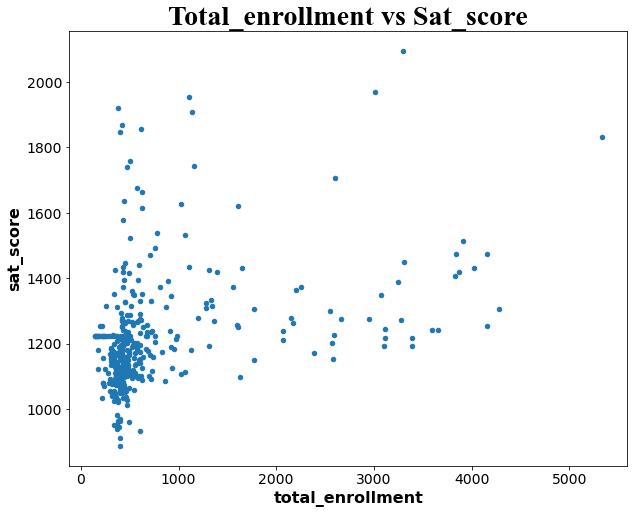

In [32]:
# Create a scatterplot.
combined.plot.scatter(x='total_enrollment', y='sat_score', fontsize=14, figsize=(10,8))
plt.xlabel('total_enrollment', fontsize=16, fontweight='bold')
plt.ylabel('sat_score', fontsize=16, fontweight='bold')
plt.title("Total_enrollment vs Sat_score", fontsize=28, fontweight='bold', fontname='Times New Roman')
plt.show()

## _Key Observations:_

Judging from the plot above, it doesn't appear there's a strong correlation between __sat_score__ and __total_enrollment__. If there was a strong correlation, we'd expect all of the points to line up. 

<br>

Instead, there's a large cluster of schools and then a few others going off in three different directions.

<br>

However, there's an interesting cluster of points at the bottom left where __total_enrollment__ and __sat_score__ are both low.

<br>

This cluster may be what's making the __r value__ so high. It's worth extracting the names of the schools in this cluster so we can research them further.

# <u> Exploring Schools with low SAT Scores and Enrollment.</u>

In [33]:
# Filter the combined dataframe to keep only those rows where "total_enrollment" is under 1000.
low_enrollment = combined[combined["total_enrollment"] < 1000]

# Filter the combined dataframe to keep only those rows where "sat_score" is under 1000.
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]

# Display all of the items in the School Name column of low_enrollment.
print(low_enrollment["School Name"])

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


## _Key Observations:_

Research through __google__ and __wikipedia__ revealed that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners.

<br>

This indicates that it's actually __ell_percent__ that correlates strongly with __sat_score__, rather than __total_enrollment__. To explore this relationship further, let's plot out __ell_percent__ vs __sat_score__.

# <u> Plotting Language Learning Percentage.</u>

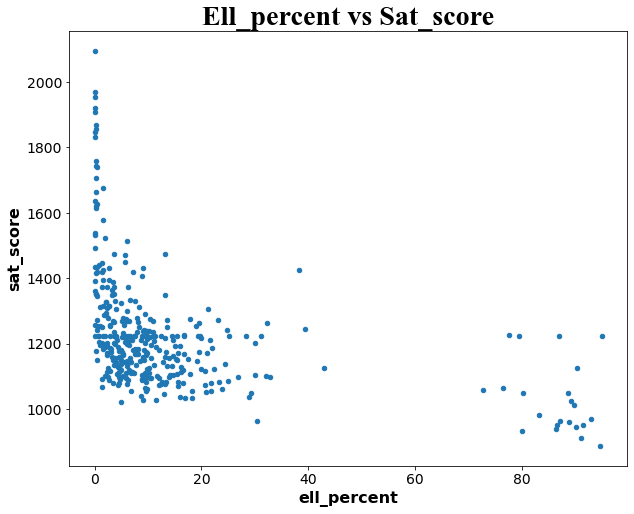

In [34]:
# scatterplot of ell_percent versus sat_score.
combined.plot.scatter(x='ell_percent', y='sat_score', fontsize=14, figsize=(10,8))
plt.xlabel('ell_percent', fontsize=16, fontweight='bold')
plt.ylabel('sat_score', fontsize=16, fontweight='bold')
plt.title("Ell_percent vs Sat_score", fontsize=28, fontweight='bold', fontname='Times New Roman')
plt.show()

# <u> Calculating District-Level Statistics.</u>

Aggregating by district, enables us to understand how __ell_percent__ varies district-by-district instead of the unintelligibly granular school-by-school variation.

In [35]:
# Find the average values for each column for each school_dist in combined.
districts = combined.groupby("school_dist").agg(np.mean)

# Reset the index of districts, making school_dist a column again.
districts.reset_index(inplace=True)

# Display the first few rows of districts to verify that everything went okay.
print(districts.head())

  school_dist  SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0          01                       441.833333           473.333333   
1          02                       426.619092           444.186256   
2          03                       428.529851           437.997512   
3          04                       402.142857           416.285714   
4          05                       427.159915           438.236674   

   SAT Writing Avg. Score    sat_score  AP Test Takers   Total Exams Taken  \
0              439.333333  1354.500000       116.681090         173.019231   
1              424.832836  1295.638184       128.908454         201.516827   
2              426.915672  1293.443035       156.183494         244.522436   
3              405.714286  1224.142857       129.016484         183.879121   
4              419.666098  1285.062687        85.722527         115.725275   

   Number of Exams with scores 3 4 or 5  Total Cohort  CSD  ...  \
0                            135.8000

# <u> Exploring Safety and SAT Scores.</u>

In [36]:
# 
print(correlations.to_string())

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

You may have noticed that __saf_t_11__ and __saf_s_11__, which measure how teachers and students perceive safety at school, correlated highly with __sat_score__.

### _Investigate safety scores._

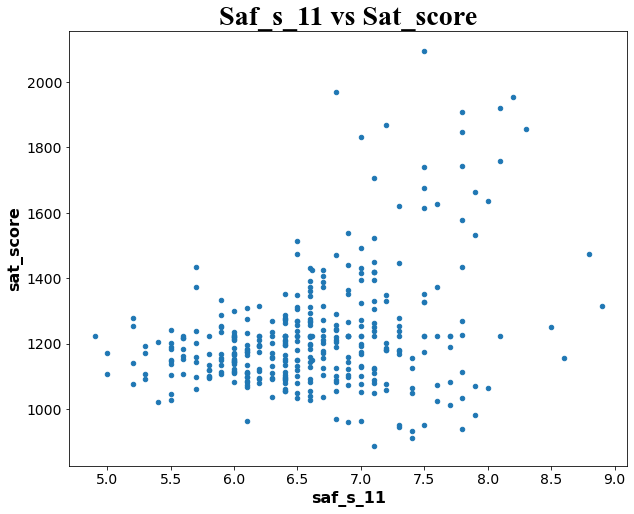

In [37]:
# scatterplot of safety_score(saf_s_11) vs sat_score.
combined.plot.scatter(x='saf_s_11', y='sat_score', fontsize=14, figsize=(10,8))
plt.xlabel('saf_s_11', fontsize=16, fontweight='bold')
plt.ylabel('sat_score', fontsize=16, fontweight='bold')
plt.title("Saf_s_11 vs Sat_score", fontsize=28, fontweight='bold', fontname='Times New Roman')
plt.show()

### _Compute Safety Scores for each borough._

__[Borough](https://www.google.com/search?q=what+is+a+borough&oq=what+is+a+borough&aqs=chrome..69i57.4236j0j1&sourceid=chrome&ie=UTF-8)__  is a town or district which is an administrative unit. You can find information about the __5 boroughs of NewYork__ [here](https://www.nycgo.com/neighborhoods-boroughs/about-nyc-five-boroughs)

In [38]:
# Find the average safety score for each column for each borough in combined.
boro = combined.groupby("boro").agg(np.mean)["saf_s_11"]

# Display boro.
print(boro)

boro
Bronx            6.606577
Brooklyn         6.370755
Manhattan        6.831370
Queens           6.721875
Staten Island    6.530000
Name: saf_s_11, dtype: float64


## _Key Observations:_

- Looks like __Manhattan(6.83)__ and __Queens(6.72)__ have a high saftey scores.


<br>

- While __Brooklyn(6.37)__ has a low safety score.

# <u> Exploring Race and SAT Scores.</u>

There are a few columns that indicate the percentage of each race at a given school:

   - __white_per__
              
            
   - __asian_per__
           
            
   - __black_per__
         
            
   - __hispanic_per__
             
             
By plotting out the __correlations__ between these __columns__ and __sat_score__, we can determine whether there are any __racial differences in SAT performance__.

### _1. Investigate Racial Differences in SAT scores._

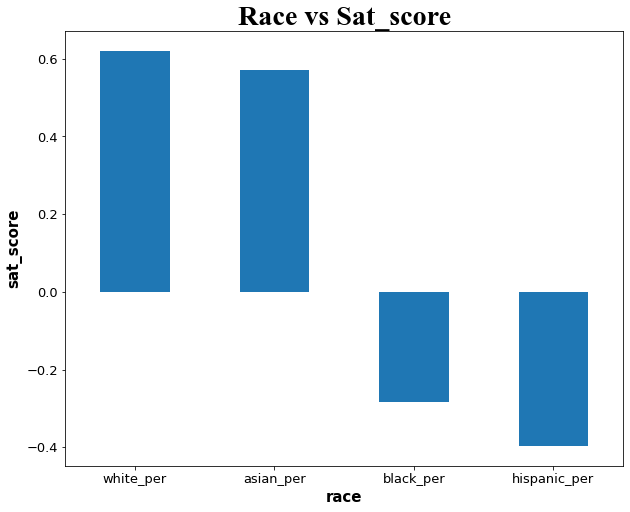

In [39]:
# Create a bar plot of the correlations between sat_score and the race columns.
combined.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]].plot.bar(figsize=(10,8), fontsize=13)
plt.title("Race vs Sat_score", fontsize=28, fontweight='bold', fontname='Times New Roman')
plt.xlabel('race', fontsize=15, fontweight='bold')
plt.ylabel('sat_score', fontsize=15, fontweight='bold')
plt.xticks(rotation=0)
plt.show()


## _Key Observations:_

- The percentage of __whites__ at the school has a positive correlation with SAT scores.

<br>

- The percentage of __Asians__ at the school has a positive correlation with SAT scores.

<br>

- The percentage of __blacks__ at the school has a negative correlation with SAT scores.

<br>

- The percentage of __hispanics__ at the school has a negative correlation with SAT scores.

<br>

- This could indicate that __race__ does not correlate with SAT scores.

<br>

- This could also indicate that the SAT is an unfair test that is unfair to __blacks__ and __hispanics__.

<br>

###  _2. Explore schools with low SAT scores and high values for hispanic_per._



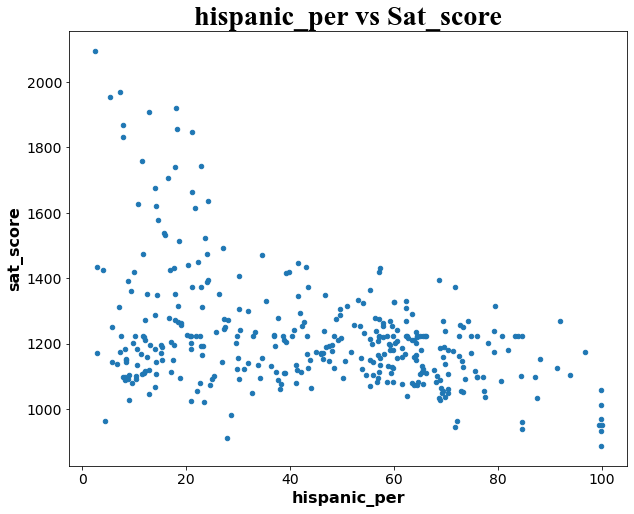

In [40]:
# Scatter plot for hispanic_per vs sat_score.
combined.plot.scatter(x='hispanic_per', y='sat_score', fontsize=14, figsize=(10,8))
plt.xlabel('hispanic_per', fontsize=16, fontweight='bold')
plt.ylabel('sat_score', fontsize=16, fontweight='bold')
plt.title("hispanic_per vs Sat_score", fontsize=28, fontweight='bold', fontname='Times New Roman')
plt.show()

## _Key Observations:_

- This plot shows that the schools with __low SAT scores and high values for hispanic_per__ have a higher percentage of __hispanics__ at the school.

<br>

- This plot also shows that __hispanic_per__ and __sat_score__ correlate in a negative way.

<br>

- This could indicate that there is __a higher percentage of hispanics at schools that have a lower SAT score__.

<br>

### _3. Research any schools with a hispanic_per greater than 95%._

In [41]:
# What are the names of the schools that have a hispanic_per greater than 95%?
print(combined[combined["hispanic_per"] > 95]["SCHOOL NAME"])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


## _Key Observations:_

based on research on google the above schools have a hispanic per greater than 95% because they are learning english, hence the low sat scores

- These schools are __EL schools__.

<br>

- __EL schools__ are schools that receive extra funding, and are intended for students who are learning English.

<br>

- This indicates that __there is a negative correlation between SAT scores and hispanic_per__. This means that __higher hispanic_per__ values are related to __lower SAT scores__.

<br>

- This could mean that __EL schools have a higher percentage of hispanics__, or that these schools are __more likely to have students who are recent immigrants__, who have a difficult time learning English.

<br>

- The column __ell_percent__ indicates the percentage of students that are learning English in a given school.

<br>

- This might be a more important factor in __SAT scores__ than __hispanic_per__.


### _4. Research any schools with a hispanic_per less than 10% and an average SAT score greater than 1800._

In [42]:
# Research any schools with a hispanic_per less than 10% and an average SAT score greater than 1800.
print(combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"])


37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


## _Key Observations:_
- These schools are __specialized high schools__, which are schools that receive extra funding and typically have high academic standards.

<br>

- This indicates that __many of the high SAT takers are coming from specialized high schools__.

<br>

- This could mean that __specialized high schools__ have a __lower percentage of hispanics__, but the __hispanic_per__ is low because they have a very high number of __high scoring__ students.

<br>


- This means that __high scoring__ students are __more likely to be recent immigrants__, who tend to be more poor and have less English language skills.

<br>

- This would indicate that the __low hispanic_per__ is __not correlated__ with SAT scores, but instead is __correlated__ with a high number of recent immigrants.

<br>

- This could be the reason that the __specialized high schools__ have such a low hispanic_per, but have such high SAT scores.


# <u>Explore Gender and SAT Scores. </u>

There are two columns that indicate the percentage of each gender at a school:

  - __male_per__
  
  
  - __female_per__
  
  
We can plot out the correlations between each percentage and __sat_score__.

### _1. Investigate gender differences in SAT scores._

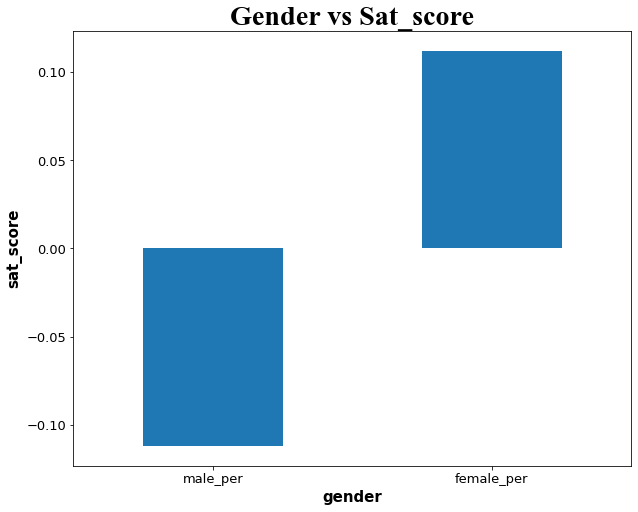

In [43]:
# Bar plot of the correlations between the columns above and sat_score.
combined.corr()["sat_score"][["male_per", "female_per"]].plot.bar(figsize=(10,8), fontsize=13)
plt.title("Gender vs Sat_score", fontsize=28, fontweight='bold', fontname='Times New Roman')
plt.xlabel('gender', fontsize=15, fontweight='bold')
plt.ylabel('sat_score', fontsize=15, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

## _Key observations_:

- There is a __significant difference__ in the __average SAT scores__ between the genders.

<br>

- This difference is __attributable to the difference in average gender percentages__ between the schools.

<br>

- __Female_per__ correlates with __higher SAT scores__, while __male_per__ correlates with __lower SAT scores__.

<br>

- This means that __gender differences__ are __not due to a higher percentage of males__ at a school.

<br>

- This could indicate that __more females__ are choosing __more selective schools__.

<br>

- This could also indicate that the __gender differences__ are __not due to an inverse correlation between gender percentage and SAT scores__.

<br>

- This could indicate that __gender differences__ are __due to other factors__, such as the __quality of the school__ itself.

# <u>Explore AP Scores vs SAT Scores. </u>

It makes sense that the number of students at a school who took __AP exams__ would be highly correlated with the school's __SAT scores__. Let's explore this relationship. 

<br>

Because __total_enrollment__ is highly correlated with __sat_score__, we don't want to lead to bias results. Instead, we'll look at the percentage of students in each school who took at least one AP exam.

In [44]:
# Calculate the percentage of students in each school that took an AP exam.
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']

### _1. Investigate the relationship between AP scores and SAT scores._

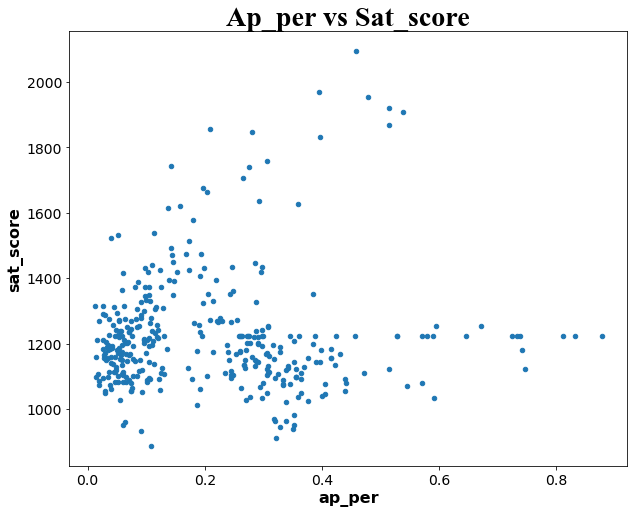

In [45]:
# Investigate the relationship between AP scores and SAT scores.
combined.plot.scatter(x='ap_per', y='sat_score', fontsize=14, figsize=(10,8))
plt.xlabel('ap_per', fontsize=16, fontweight='bold')
plt.ylabel('sat_score', fontsize=16, fontweight='bold')
plt.title("Ap_per vs Sat_score", fontsize=28, fontweight='bold', fontname='Times New Roman')
plt.show()

## _Key observations_:
- This plot shows that __ap_per__ and __sat_score__ have a __positive correlation__.

<br>

- This indicates that __students who take AP exams__ are __more likely to have higher SAT scores__.

<br>

- This could indicate that __AP classes__ are __more likely to be of higher quality__, or that __students who take AP exams__ are __more likely to be __more prepared__ for college.

<br>

- This could also indicate that __students who take AP exams__ are __more likely to be __more academically inclined__.

<br>

- This could also indicate that __high schools__ with __more AP classes__ have a __higher average SAT score__.

<br>


# <u>Explore class_size vs SAT Scores. </u>

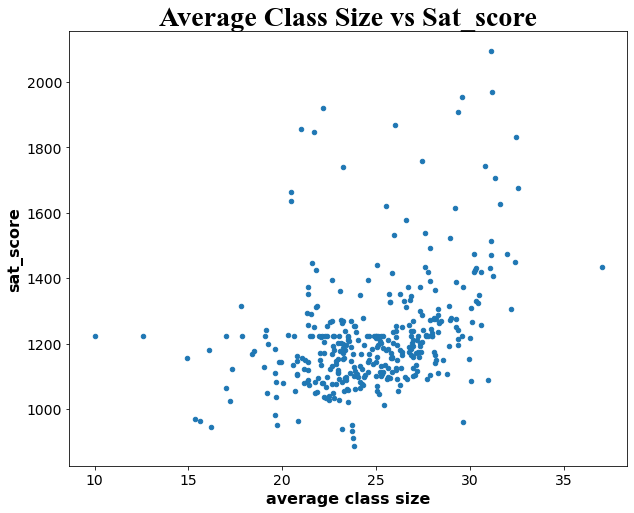

In [46]:
# Investigate the relationship between class size and SAT scores.
combined.plot.scatter(x='AVERAGE CLASS SIZE', y='sat_score', fontsize=14, figsize=(10,8))
plt.xlabel('average class size', fontsize=16, fontweight='bold')
plt.ylabel('sat_score', fontsize=16, fontweight='bold')
plt.title("Average Class Size vs Sat_score", fontsize=28, fontweight='bold', fontname='Times New Roman')
plt.show()

## _Key observations:_

- This plot shows that __class size__ and __sat_score__ have a __negative correlation__.

<br>


- This could indicate that __smaller class sizes__ are __more likely to be of higher quality__, or that __students who take AP exams__ are __more likely__ to be __more prepared__ for college.

<br>


- This could also indicate that __smaller class sizes__ are __more of a priority__ for students, which would mean that the __quality of the school__ is __more important__ to them than the number of students.

<br>


# <u> Neighborhoods That Have The Best Schools. </u>

### _1. Schools with Highest Sat Scores._

In [63]:
# schools with the highest number of sat scores
print(combined.sort_values(by='sat_score', ascending=False)[['SCHOOL NAME','sat_score']].head(10))

                                           SCHOOL NAME  sat_score
37                              STUYVESANT HIGH SCHOOL     2096.0
151                       BRONX HIGH SCHOOL OF SCIENCE     1969.0
356                STATEN ISLAND TECHNICAL HIGH SCHOOL     1953.0
155  HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE     1920.0
302                        TOWNSEND HARRIS HIGH SCHOOL     1910.0
327  QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...     1868.0
5                       BARD HIGH SCHOOL EARLY COLLEGE     1856.0
79   HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...     1847.0
187                     BROOKLYN TECHNICAL HIGH SCHOOL     1833.0
26                       ELEANOR ROOSEVELT HIGH SCHOOL     1758.0


### _2. Neighborhoods of the Schools with Highest Sat Scores._

In [64]:
# which neighborhoods have the best schools
print(combined.sort_values(by='sat_score', ascending=False)[['Location 1','sat_score']].head(10))


                                            Location 1  sat_score
37   345 Chambers Street\nNew York, NY 10282\n(40.7...     2096.0
151  75 West 205 Street\nBronx, NY 10468\n(40.87705...     1969.0
356  485 Clawson Street\nStaten Island, NY 10306\n(...     1953.0
155  2925 Goulden Avenue\nBronx, NY 10468\n(40.8712...     1920.0
302  149-11 Melbourne Avenue\nFlushing, NY 11367\n(...     1910.0
327  94-50 159 Street\nJamaica, NY 11433\n(40.70099...     1868.0
5    525 East Houston Street\nNew York, NY 10002\n(...     1856.0
79   240 Convent Ave\nNew York, NY 10031\n(40.82112...     1847.0
187  29 Ft Greene Place\nBrooklyn, NY 11217\n(40.68...     1833.0
26   411 East 76 Street\nNew York, NY 10021\n(40.77...     1758.0


## _Key observations:_

<br>

- The __neighborhoods__ that have the highest __Sat scores__ are __upper class neighborhoods__.

<br>

- This could indicate that __upper class neighborhoods__ are more __academic__, and have __better schools__.

<br>

- Looks ike most are in __Newyork__

<br>


# <U><h1><center> END </center></h1></U>